In [1]:
include("EEG_LIF_model.jl");

using DelimitedFiles


In [2]:
#Initialize parameters

#Sample time window (for time binning)
dts = 100

#Integration time step
h = 4/100

#Max run time
T = 100000

#Transient time
Transient = 50000

#Network parameters
ce = 14
Kin = 32

Ne = ce^2
Ni = Int(ce/2)^2

N = Ne+Ni

#Parameter space grid size
Ntau = 5

#Save file directory
ddir = "tau_mu_map_$(Ntau)x$(Ntau)/"

isdir(ddir) || mkdir(ddir)


true

In [3]:
#Build network (Two lattice)
KK,C,KIout = BuildNet(ce);

#############################
#Obtain Adjacency matrix
A = zeros(Bool,N,N)

ll = zeros(Int,N)

for i in 1:N
    
    l = sum(KK[i,:].>0)
    
    ll[i] = l
    
    A[i,KK[i,1:l]] .= 1
    
end



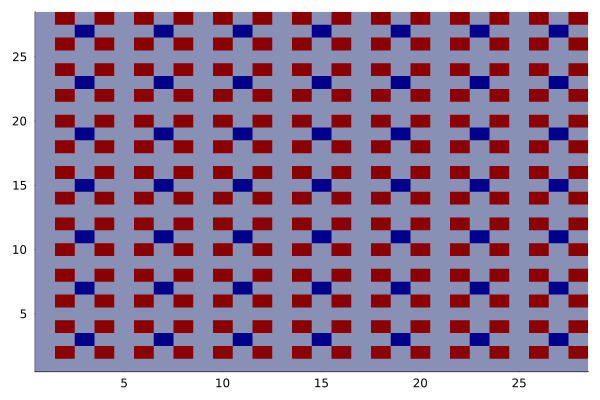

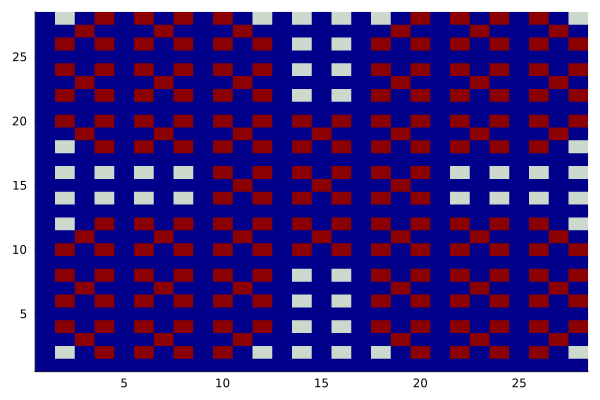

In [4]:
#Central neuron of the groups we will monitor
IIdn = [9,13,25,37,41]

#Plot Network 
#First Plot (Red:Excitatory, Blue:Inhibiotory)
#Second plot (Red:Monitored neuron groups, White:Not monitored groups)
Plot_Net(C,IIdn)


In [5]:
#Model parameters

#Excitatory synaptic max amplitude
V0d = 10

#Inhibitory synaptic max amplitude
V0h = -4. *V0d

#Noise level in inhibitory population
nu = 0.0

#Range of synaptic resources recovery time constant
taurS = LinRange(0,300,Ntau+1)

#Range of excitatory neuron noise level
muS = LinRange(0,15,Ntau+1);


In [6]:
for mu in muS

    #Paralell for loop using all process available for Julia
    Threads.@threads :static for i in 1:Ntau+1

        taur = taurS[i]
        
        file = "Data_States_LIF_EEG_mu_$(mu)_taur_$(taur)_Vd_$(V0d)"
        
        filename = ddir*file
        
        LIF_Sim_TauMu_bymodules(N,Ne,A,KK,KIout,V0d,taur,mu,filename,IIdn,T,dts,h,Transient)

        println("taur=",taur," mu=",mu, ":: OK! ")

    end
end


taur=240.0 mu=0.0:: OK! 
taur=120.0 mu=0.0:: OK! 
taur=180.0 mu=0.0:: OK! 
taur=60.0 mu=0.0:: OK! 
taur=0.0 mu=0.0:: OK! 
taur=300.0 mu=0.0:: OK! 
taur=120.0 mu=3.0:: OK! 
taur=240.0 mu=3.0:: OK! 
taur=60.0 mu=3.0:: OK! 
taur=180.0 mu=3.0:: OK! 
taur=0.0 mu=3.0:: OK! 
taur=300.0 mu=3.0:: OK! 
taur=0.0 mu=6.0:: OK! 
taur=240.0 mu=6.0:: OK! 
taur=300.0 mu=6.0:: OK! 
taur=120.0 mu=6.0:: OK! 
taur=180.0 mu=6.0:: OK! 
taur=60.0 mu=6.0:: OK! 
taur=120.0 mu=9.0:: OK! 
taur=0.0 mu=9.0:: OK! 
taur=240.0 mu=9.0:: OK! 
taur=60.0 mu=9.0:: OK! 
taur=180.0 mu=9.0:: OK! 
taur=300.0 mu=9.0:: OK! 
taur=0.0 mu=12.0:: OK! 
taur=60.0 mu=12.0:: OK! 
taur=180.0 mu=12.0:: OK! 
taur=300.0 mu=12.0:: OK! 
taur=120.0 mu=12.0:: OK! 
taur=240.0 mu=12.0:: OK! 
taur=60.0 mu=15.0:: OK! 
taur=240.0 mu=15.0:: OK! 
taur=180.0 mu=15.0:: OK! 
taur=120.0 mu=15.0:: OK! 
taur=0.0 mu=15.0:: OK! 
taur=300.0 mu=15.0:: OK! 
